<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Challenge S7: Clasificación de Secuencias

## Objetivos 

El objetivo de este challenge es continuar aprendiendo a trabajar con secuencias a partir del ejemplo visto en el worksheet.

### Punto de partida

Como hemos hecho en otras ocasiones, para este challenge vamos a comenzar como punto de partida con el código visto en el worksheet sobre el que realizaremos las modificaciones necesarias.

Sentíos libres de modificar la cantidad de datos que utilizamos para entrenamiento de forma que el tiempo no sea demasiado grande, aunque siempre es bueno hacer una prueba al final con todos los datos, o al menos con bastantes, para tener una idea del rendimiento final.

In [10]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
x_train = x_train[1:2500,:]
y_train = y_train[1:2500]

x_test = x_test[1:2500,:]
y_test = y_test[1:2500]

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


### Análisis del rendimiento

Añadid a continuación el código necesario para guardar la información de cada entrenamiento en una variable.
A continuación, reentrenad la red y mostrad las curvas de aprendizaje del entrenamiento.

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)


print('Test score:', score)
print('Test accuracy:', acc)

Train on 2499 samples, validate on 2499 samples
Epoch 1/15
2499/2499 [==============================] - 10s 4ms/step - loss: 0.6699 - acc: 0.5950 - val_loss: 0.5708 - val_acc: 0.7059
Epoch 2/15
2499/2499 [==============================] - 9s 3ms/step - loss: 0.3451 - acc: 0.8523 - val_loss: 0.4871 - val_acc: 0.7587
Epoch 3/15
2499/2499 [==============================] - 8s 3ms/step - loss: 0.1114 - acc: 0.9620 - val_loss: 0.5327 - val_acc: 0.7607
Epoch 4/15
2499/2499 [==============================] - 9s 3ms/step - loss: 0.0379 - acc: 0.9908 - val_loss: 0.9470 - val_acc: 0.7615
Epoch 5/15
2499/2499 [==============================] - 9s 4ms/step - loss: 0.0175 - acc: 0.9944 - val_loss: 1.1983 - val_acc: 0.7515
Epoch 6/15
2499/2499 [==============================] - 9s 4ms/step - loss: 0.0651 - acc: 0.9800 - val_loss: 0.9511 - val_acc: 0.7411
Epoch 7/15
2499/2499 [==============================] - 9s 4ms/step - loss: 0.0186 - acc: 0.9956 - val_loss: 0.9439 - val_acc: 0.7655
Epoch 8/15
24

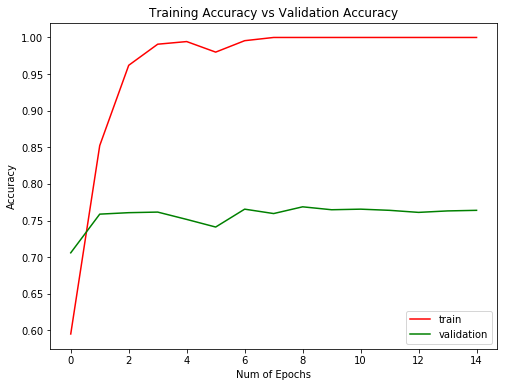

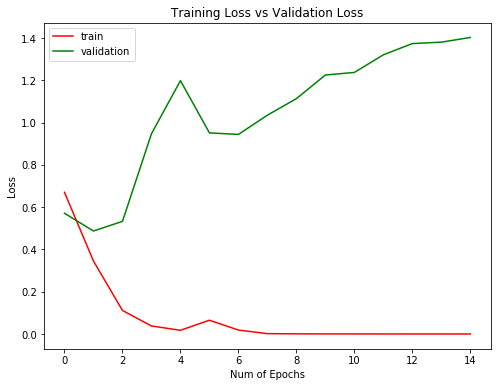

In [12]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import matplotlib.pyplot as plt
import numpy as np

def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['acc'],'r')
    plt.plot(history.history['val_acc'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
 
 
    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
 
 
    plt.show()
    
plotCurves(history,15)

### Dropout

Vamos a empezar a modificar el código añadiendo Dropout, lo que nos va a permitir mejorar el entrenamiento, reducir el sobreentramiento, y empezar a realizar modificaciones en el código.

A continuación copiad y pegad el código anterior y realizar las modificaciones necesarias para:
- Realizar dropout sobre la capa Embedding con una probabilidad del 20%
- Realizar dropout sobre la capa LSTM con una probabilidad del 20%

Recordad mostrar las curvas de entrenamiento.

Uno de los efectos que podemos observar (y convendría recordar) cuando realizamos dropout es que a la red le cuesta más entrenar y tarda más en mejorar los resultados de train. A cambio, tiene un menor sobreentrenamiento y aunque tarde más el resultado final suele mejorar.

In [13]:
print('Build model...')
model2 = Sequential()
model2.add(Embedding(max_features, 128))
model2.add(Dropout(0.2))

model2.add(LSTM(128))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=15,
                      validation_data=(x_test, y_test))

score2, acc2 = model2.evaluate(x_test, y_test,
                               batch_size=batch_size)

print('Test score:', score2)
print('Test accuracy:', acc2)


Build model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 2499 samples, validate on 2499 samples
Epoch 1/15
2499/2499 [==============================] - 10s 4ms/step - loss: 0.6879 - acc: 0.5662 - val_loss: 0.6544 - val_acc: 0.6687
Epoch 2/15
2499/2499 [==============================] - 9s 3ms/step - loss: 0.4629 - acc: 0.7983 - val_loss: 0.5101 - val_acc: 0.7603
Epoch 3/15
2499/2499 [==============================] - 9s 4ms/step - loss: 0.1751 - acc: 0.9396 - val_loss: 0.6101 - val_acc: 0.7763
Epoch 4/15
2499/2499 [==============================] - 9s 4ms/step - loss: 0.0551 - acc: 0.9836 - val_loss: 0.5958 - val_acc: 0.7411
Epoch 5/15
2499/2499 [==============================] - 9s 4ms/step - loss: 0.0287 - acc: 0.9916 - val_loss: 0.6645 - val_acc: 0.7579
Epoch 6/15
2499/2499 [==============================] - 10s 4ms/step - loss: 0.0171 - acc: 0.9960 - val_loss: 1.1677 - val_acc: 0.7475
Epoch 7/15
2499/

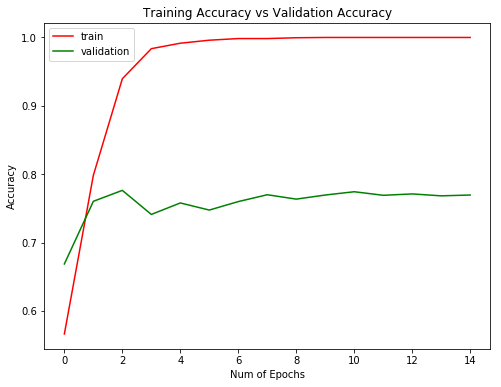

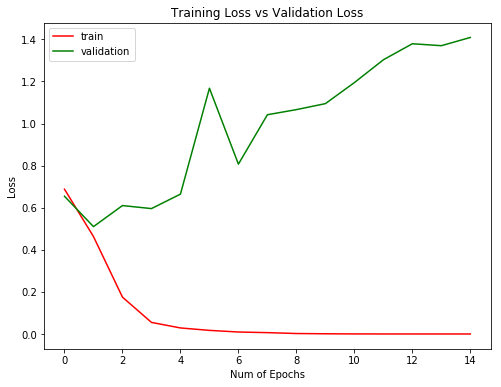

In [14]:
plotCurves(history2,15)

### CNNs + LSTMs + DNNs!

En este apartado vamos a intentar realizar una modificación un poco más compleja a nuestro sistema base.

Como sabemos, las redes Convolucionales o CNN están inspiradas en la vista humana y son muy buenas en la extracción de características sobre imágenes. Además de esto, han sido aplicadas con éxito a señales como la señal de audio o incluso señales temporales como los precios de un stock en el mercado de valores.

Sin embargo, para trabajar con secuencias, sabemos que la mejor opción son las redes recurrentes, donde destaca particularmente la red LSTM.

Sin embargo, una de las mejores cualidades de las redes neuronales es que son muy flexibles y podemos implementar fácilmente casi cualquier arquitectura que imaginemos. En este apartado vamos a utilizar una red que está siendo utilizada a día de hoy en muchisimos sistemas de empresas como Google, Amazon o Facebook, que lideran cláramente este campo. 

Esta red es una combinación de redes convolucionales, recurrentes, y feed-forward. ¿Por qué esta combinación?
- Las redes convolucionales son buenas como extractor de características y pueden encontrar información muy útil de forma local, sobre pequeños campos receptivos de los datos de entrada
- Las redes LSTM son buenas para modelar cualquier tipo de secuencia, ya que pueden aprender del pasado y tener en cuenta el contexto
- Las redes DNN son buenas aprendiendo cualquier tipo de transformación no lineal, y por tanto en nuestro ejemplo las vamos a utilizar para extraer la salida de las LSTM y convertirla en la solución a la tarea que estamos intentando resolver


Manos a la obra, qué necesitamos para introducir estos cambios?
- Importar las nuevas capas que vamos a necesitar, que son las siguientes: 
    - Conv1D , es como Conv2D pero trabaja con datos de 1 sóla dimensión.
    - MaxPooling1D , lo mismo
- Modificar el modelo añadiendo las capas necesarias, buscad en la documentación de keras o en algún ejemplo en google la sintaxis. Ojo!! la sintaxis ha ido cambiando con las versiones, aunque los cambios son mínimos y suelen mostrarse en el error que nos de.
- Al estar trabajando con Conv1D y MaxPooling1D no necesitamos ningún reshape, ya que todo va a estar siempre en una dimensión.


¿Cómo va a ser nuestro modelo?
- Definimos un modelo de tipo secuencial
- Capa de Embedding igual que la de origen
- Capa convolucional de una dimensión, con 32 filtros y campo receptivo 3x3
- Capa de pooling de 1 dimensión, con tamaño de pool 2x2
- LSTM de tamaño 128, igual que la de origen
- Capa de salida, igual que la de origen.

A continuación deberemos copiar y pegar el código de origen y realizar los cambios mencionados, recordad mostrar las curvas de aprendizaje.

In [15]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv1D, MaxPooling1D

print('Build model...')
modelfinal = Sequential()
modelfinal.add(Embedding(max_features, 128))
modelfinal.add(Dropout(0.2))

modelfinal.add(Conv1D(32, kernel_size=(3), padding='same', activation='relu'))
modelfinal.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

modelfinal.add(LSTM(128))
modelfinal.add(Dropout(0.2))
modelfinal.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
modelfinal.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

historyfinal = modelfinal.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=15,
                                validation_data=(x_test, y_test))

scorefinal, accfinal = modelfinal.evaluate(x_test, y_test,
                                           batch_size=batch_size)

print('Test score:', scorefinal)
print('Test accuracy:', accfinal)

Build model...
Train on 2499 samples, validate on 2499 samples
Epoch 1/15
2499/2499 [==============================] - 8s 3ms/step - loss: 0.6838 - acc: 0.5342 - val_loss: 0.6464 - val_acc: 0.5978
Epoch 2/15
2499/2499 [==============================] - 6s 2ms/step - loss: 0.4255 - acc: 0.8187 - val_loss: 0.4653 - val_acc: 0.7787
Epoch 3/15
2499/2499 [==============================] - 6s 2ms/step - loss: 0.1225 - acc: 0.9620 - val_loss: 0.5565 - val_acc: 0.7931
Epoch 4/15
2499/2499 [==============================] - 6s 2ms/step - loss: 0.0254 - acc: 0.9948 - val_loss: 0.8517 - val_acc: 0.7735
Epoch 5/15
2499/2499 [==============================] - 6s 2ms/step - loss: 0.0065 - acc: 0.9988 - val_loss: 0.7605 - val_acc: 0.7851
Epoch 6/15
2499/2499 [==============================] - 6s 2ms/step - loss: 0.0059 - acc: 0.9988 - val_loss: 1.0121 - val_acc: 0.7723
Epoch 7/15
2499/2499 [==============================] - 6s 2ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.0413 - val_acc: 0.7787

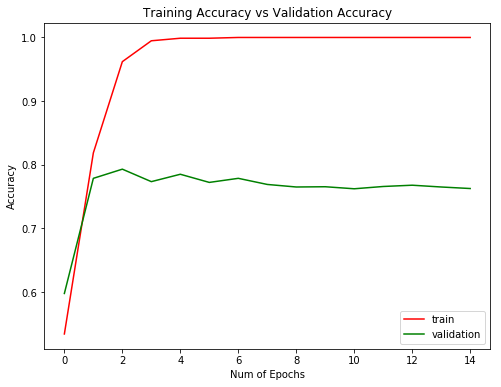

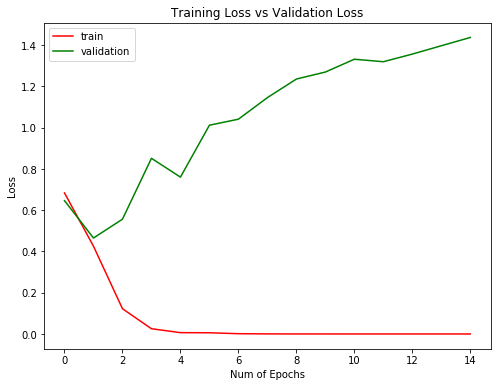

In [16]:
plotCurves(historyfinal,15)

Se puede observar que a pesar de añadir complejidad a la red, los resultados no están mejorando, seguimos obteniendo overfitting en todos ellos. Esto se puede ver analizando todas las funciones de coste de validación vs entrenamiento y se observa que, a pesar de que en la de entrenamiento se obtienen buenos resultados, las funciones de coste de test empeoran bastante.

### Opcional: Optimización del resultado

Si nos fijamos en los resultados, vemos que estamos implantando modelos más y más complejos pero no mejoramos mucho el resultado final. Esto se debe a que estamos utilizando muy pocos datos.

Dado que este es el último challenge (^^) vamos a intentar mezclar lo aprendido de forma un poco más creativa. El factor limitante para los resultados obtenidos con esta red es la cantidad de datos. Sin embargo, si aumentamos los datos que utilizamos, el entrenamiento será mucho más lento. Por otro lado, si aumentamos la cantidad de datos de entrenamiento es posible que lleguemos al modelo óptimo en menos épocas. ¿Cómo sabemos cuantas épocas? ¿Y el LR que debemos utilizar? Vamos a por ello:

En el apartado final, vamos a intentar optimizar el resultado de nuestra red neuronal, para ello vamos a aumentar el número de datos a utilizar, y además podemos probar todo lo que se nos ocurra para hacer este entrenamiento más eficiente. 

Dejamos unas cuantas ideas que podrían servir de ayuda, sin embargo, no es necesario que dediquéis demasiado tiempo y probeis todas las opciones, tan solo os ofrecemos la posibilidad de jugar :)
- Separar parte del conjunto de train y utilizarlo como validación
- Utilizar el callback ReduceLROnPlateau para librarnos de elegir un buen LR, empezamos con un LR un poco alto y lo dejamos bajar.
- Modificar el bucle para programar un criterio de parada, o utilizar el callback EarlyStopping para que se haga de forma automática
- Guardar el mejor resultado obtenido durante el entrenamiento (utilizando el conjunto de validación) en lugar del último

Por último, no olvideis escribir al final del documento vuestras impresiones acerca de cómo han afectado estos cambios o vuestra percepción acerca del rendimiento y nuestra red. Podéis serviros tanto de los resultados que observeis como de las nociones teóricas que tenemos.